In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import re
import matplotlib.patches as patches
import matplotlib

df = pd.read_csv('features.csv')

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

Skewness of Average Price: 2.394561380677116


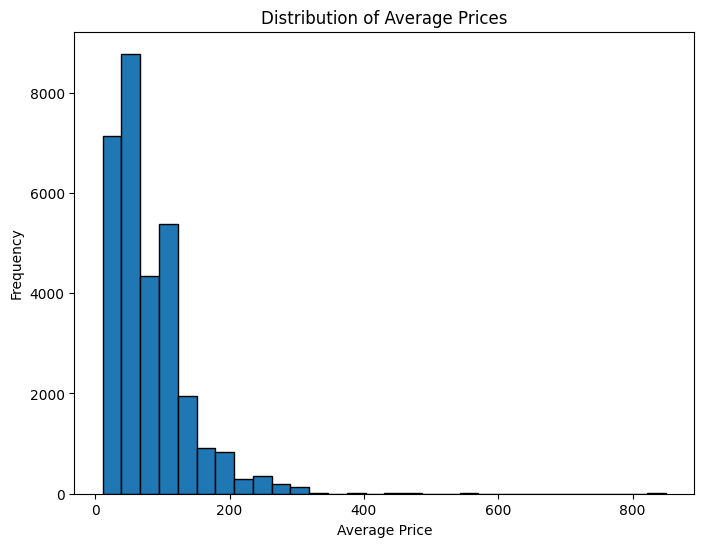

In [2]:
average_skewness = df['Average'].skew()
print(f'Skewness of Average Price: {average_skewness}')

# Plot the distribution of 'Average' prices
plt.figure(figsize=(8, 6))
plt.hist(df['Average'], bins=30, edgecolor='black')
plt.title('Distribution of Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

In [3]:
df['log_average'] = np.log1p(df['Average'])

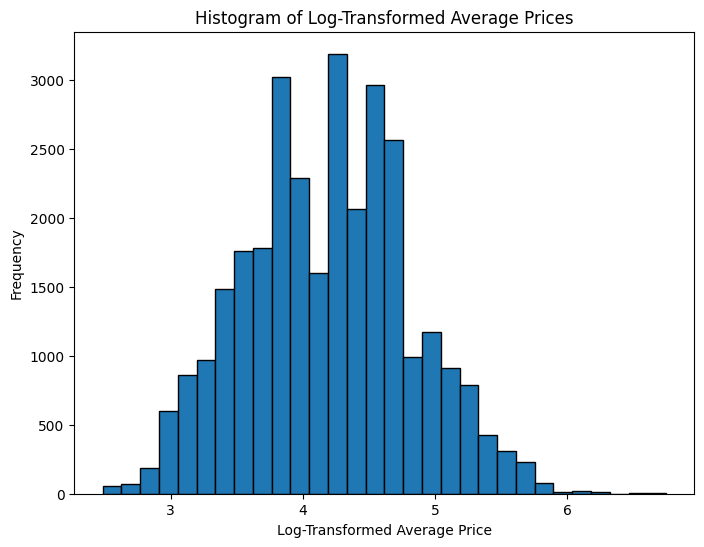

In [4]:
plt.figure(figsize=(8, 6))
plt.hist(df['log_average'], bins=30, edgecolor='black')
plt.title('Histogram of Log-Transformed Average Prices')
plt.xlabel('Log-Transformed Average Price')
plt.ylabel('Frequency')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Minimum', 'Maximum', 'day', 'month', 'year', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter' , 'log_average']]  # Features
y = df['Average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.09200301890022972
R-squared Score: 0.9999670010410547
